In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

sns.set_style("darkgrid")


In [2]:
all_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet", engine="fastparquet")
all_repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_repository.parquet", engine="fastparquet")
all_user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_user.parquet", engine="fastparquet")

/Users/dungp@backbase.com/Documents/aidev-mining/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
all_pr_df.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264016139,1688,`metta code` --> `metta clip` and additional p...,Remove unused `root_key` variable to fix ruff ...,Claude_Code,37011,jacklionheart,closed,2025-07-25T18:15:36Z,2025-07-25T19:17:23Z,2025-07-25T19:17:23Z,8.439884e+08,https://api.github.com/repos/Metta-AI/metta,https://github.com/Metta-AI/metta/pull/1688
1,3264021033,41,feat: Comprehensive ruff error resolution with...,## 🎯 Mission Accomplished: 100% Ruff Error Res...,Claude_Code,131842369,Draco3310,open,2025-07-25T18:17:57Z,None,None,9.920635e+08,https://api.github.com/repos/Draco3310/Gal-Fri...,https://github.com/Draco3310/Gal-Friday2/pull/41
2,3264042289,1600,Add Evals frontend implementation plan and HTM...,\nCreate comprehensive implementation plan for...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:15Z,2025-07-25T23:19:14Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
3,3264042318,1601,Add 4 new BfDs components for Evals interface ...,\nPhase 1 component creation for the Evals fro...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:16Z,2025-07-25T23:19:11Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
4,3264067496,3,🚀 Complete Frontend-Backend API Integration wi...,## 🎯 Summary\n\nThis PR completes the **fronte...,Claude_Code,42357482,twitchyvr,closed,2025-07-25T18:39:14Z,2025-07-25T18:48:47Z,2025-07-25T18:48:47Z,1.025871e+09,https://api.github.com/repos/twitchyvr/Spaghetti,https://github.com/twitchyvr/Spaghetti/pull/3


In [4]:
all_pr_df.shape

(932791, 14)

In [5]:
all_pr_df['id'].nunique()

932791

In [6]:
all_pr_df.isnull().sum()

id                 0
number             0
title              1
body            8773
agent              0
user_id            0
user               0
state              0
created_at         0
closed_at      72864
merged_at     142652
repo_id         2499
repo_url           0
html_url           0
dtype: int64

In [7]:
all_pr_df.agent.value_counts()

agent
OpenAI_Codex    814522
Copilot          50447
Cursor           32941
Devin            29744
Claude_Code       5137
Name: count, dtype: int64

In [8]:
all_pr_df.repo_id.nunique()

116211

In [9]:
all_pr_df.groupby('agent')['repo_id'].nunique().reset_index()

,agent,repo_id
0,Claude_Code,1909
1,Copilot,14465
2,Cursor,12669
3,Devin,4747
4,OpenAI_Codex,84551


In [10]:
all_pr_df.groupby('agent')['user_id'].nunique().reset_index()

,agent,user_id
0,Claude_Code,1643
1,Copilot,379
2,Cursor,9658
3,Devin,1
4,OpenAI_Codex,61653


In [11]:
all_pr_df.state.value_counts()

state
closed    859927
open       72864
Name: count, dtype: int64

In [12]:
all_repo_df.head()

,id,url,license,full_name,language,forks,stars
0,987641962,https://api.github.com/repos/1010-dev/senjudev...,None,1010-dev/senjudev-site,TypeScript,1.0,0.0
1,990249393,https://api.github.com/repos/106-/HellSinkerWa...,None,106-/HellSinkerWallPaper,Java,0.0,0.0
2,1009549206,https://api.github.com/repos/1genadam/tileshop...,None,1genadam/tileshop-rag,Python,0.0,0.0
3,983546765,https://api.github.com/repos/1kimnet/ETL-pipeline,None,1kimnet/ETL-pipeline,Python,0.0,0.0
4,1024190983,https://api.github.com/repos/20m61/lightningta...,None,20m61/lightningtalk-circle,JavaScript,0.0,0.0


In [13]:
all_repo_df.id.nunique()

116211

In [14]:
all_repo_df[all_repo_df.id.isin(all_pr_df.repo_id) == False]

,id,url,license,full_name,language,forks,stars


In [15]:
all_repo_df.isnull().sum()

id               0
url              0
license      76106
full_name        0
language     11986
forks            0
stars            0
dtype: int64

In [16]:
all_repo_df.forks.describe()

count    116211.00000
mean         19.02899
std         507.89451
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       62633.00000
Name: forks, dtype: float64

In [17]:
all_repo_df.stars.describe()

count    116211.000000
mean        105.570695
std        2075.802400
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      203424.000000
Name: stars, dtype: float64

In [18]:
all_repo_df.license.value_counts().head()

license
MIT            22945
Apache-2.0      5895
NOASSERTION     4165
GPL-3.0         3295
AGPL-3.0        1098
Name: count, dtype: int64

In [19]:
all_user_df.head()

,id,login,followers,following,created_at
0,149159513.0,00012122Cs,0.0,0.0,2023-10-27T10:22:50Z
1,86906973.0,000Sean000,0.0,2.0,2021-07-04T07:05:40Z
2,36679210.0,000alen,46.0,106.0,2018-02-20T21:00:55Z
3,201261210.0,000qhrey,0.0,1.0,2025-02-28T16:53:21Z
4,22735204.0,00125495,0.0,1.0,2016-10-10T01:24:34Z


In [20]:
all_user_df.dtypes

id            float64
login          object
followers     float64
following     float64
created_at     object
dtype: object

In [21]:
all_user_df.isnull().sum()

id            22
login          0
followers     22
following     22
created_at    22
dtype: int64

In [22]:
all_user_df.shape

(72189, 5)

In [23]:
all_user_df.id.nunique()

72167

# Repo > 100 stars

In [62]:
pr_df.shape

(33596, 14)

In [24]:
# Basic
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/repository.parquet")
user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/user.parquet")

# Comments and reviews
pr_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments_v2.parquet")

# Commits
pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

# Related issues
related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")

# Events
pr_timeline_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")

# Task type
pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")

# Human-PR
human_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pull_request.parquet")
human_pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pr_task_type.parquet")

In [155]:
pr_task_type_df.head()

,agent,id,title,reason,type,confidence
0,Claude_Code,3264933329,Fix: Wait for all partitions in load_collectio...,title provides conventional commit label,fix,10
1,Claude_Code,3265709660,feat: add comprehensive README screenshots wit...,title provides conventional commit label,feat,10
2,Claude_Code,3265782173,chore: remove HashedPostStateProvider trait,title provides conventional commit label,chore,10
3,Claude_Code,3231949586,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10
4,Claude_Code,3231950376,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10


In [143]:
human_pr_df.head()

,id,number,title,user,user_id,state,created_at,closed_at,merged_at,repo_url,html_url,body,agent
0,2336888723,85268,feat(aci): add automations index page,ameliahsu,55610339,closed,2025-02-14T19:04:59Z,2025-02-18T22:42:20Z,2025-02-18T22:42:19Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/85268,https://sentry-j41gpomr5.sentry.dev/automation...,Human
1,2447123365,89131,ref(insights): Make use of `<FeatureBadge>` fo...,ryan953,187460,closed,2025-04-08T23:29:50Z,2025-04-09T15:56:55Z,2025-04-09T15:56:54Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/89131,Using the premade component reduces an import ...,Human
2,2438086945,88748,:bug: fix: update how we fetch workflow_id and...,iamrajjoshi,33237075,closed,2025-04-03T21:36:59Z,2025-04-04T15:10:57Z,2025-04-04T15:10:57Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/88748,i realized i made a mistake for how i fetch th...,Human
3,2265431531,83085,fix(org-stats): Require project membership,ArthurKnaus,7033940,closed,2025-01-08T07:47:13Z,2025-01-08T08:49:40Z,2025-01-08T08:49:40Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/83085,### Problem\r\n\r\nIf the user is not member o...,Human
4,2332333882,85102,ref(consumers): Rename parallel -> batched-par...,evanpurkhiser,1421724,closed,2025-02-12T21:24:17Z,2025-02-12T22:20:33Z,2025-02-12T22:20:33Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/85102,Both crons and uptime consumers have a paralle...,Human


In [156]:
pr_commits_df.head()

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


In [157]:
pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n..."
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im..."
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i..."
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt..."


In [160]:
human_pr_df['id'].unique()

array([2336888723, 2447123365, 2438086945, ..., 2284333641, 2503287360,
       2566240535], shape=(6618,))

In [163]:
human_pr_df[human_pr_df['id'].isin(pr_commit_details_df.pr_id.unique())]

,id,number,title,user,user_id,state,created_at,closed_at,merged_at,repo_url,html_url,body,agent


In [144]:
check = human_pr_df.copy()
check['is_merged'] = np.where(check['merged_at'].isna(), 0, 1)
check['is_merged'].value_counts()


is_merged
1    5081
0    1537
Name: count, dtype: int64

In [146]:
human_pr_task_type_df.head()

,agent,id,title,reason,type,confidence
0,Human,2438086945,:bug: fix: update how we fetch workflow_id and...,The PR title and description indicate a correc...,fix,NaN
1,Human,2336888723,feat(aci): add automations index page,The title indicates the addition of a new feat...,feat,NaN
2,Human,2564963212,feat(insights): update ux for open in explore ...,The PR introduces updated user experience (UX)...,feat,NaN
3,Human,2474210990,feat(compare): Add timestamp column to sample ...,The PR introduces a new feature by adding a ti...,feat,NaN
4,Human,2486573779,ref(perf-issues): Consolidate File IO override...,The PR improves the performance issue detectio...,perf,NaN


In [145]:
5081/(5081+1537)

0.7677546086430946

In [147]:
pr_reviews_df.head()

,id,pr_id,user,user_type,state,submitted_at,body
0,2885691382,3107321792,coderabbitai[bot],Bot,COMMENTED,2025-06-01T14:22:22Z,**Actionable comments posted: 2**\n\n<details>...
1,2885712797,3107321792,coderabbitai[bot],Bot,COMMENTED,2025-06-01T14:37:45Z,**Actionable comments posted: 1**\n\n<details>...
2,3059587397,3234660269,Fank,User,COMMENTED,2025-07-27T15:06:40Z,None
3,3059589121,3234660269,benfdking,User,COMMENTED,2025-07-27T15:12:52Z,None
4,2813254905,3037457814,wilsonccccc,User,APPROVED,2025-05-03T15:34:42Z,None


In [148]:
pr_reviews_df.shape

(28875, 7)

In [150]:
pr_reviews_df.pr_id.nunique()

8140

In [151]:
pr_reviews_df.user_type.value_counts()

user_type
User    16895
Bot     11979
Name: count, dtype: int64

In [152]:
16895/(16895+11979)

0.5851284892983307

In [63]:
pr_commits_df.head()

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


In [68]:
pr_commits_df.shape

(88576, 5)

In [69]:
pr_commits_df.pr_id.nunique()

33580

In [73]:
pr_commits_df[["pr_id", "sha"]].drop_duplicates().shape

(88564, 2)

In [75]:
pr_df.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625


In [79]:
merged_pr_mask = ~pr_df['merged_at'].isna()
merged_pr_ids = pr_df[merged_pr_mask]['id']
patch_mask = pr_commit_details_df['pr_id'].isin(merged_pr_ids)
check = pr_commit_details_df[patch_mask]['patch'].dropna()

In [84]:
pr_df.shape

(33596, 14)

In [87]:
check = pr_df.copy()
check['is_merged'] = np.where(pr_df['merged_at'].isna(), 0, 1)

In [88]:
check['is_merged'].value_counts()

is_merged
1    24014
0     9582
Name: count, dtype: int64

In [89]:
24014/(24014+9582)

0.714787474699369

In [96]:
re = check.groupby('agent')['is_merged'].value_counts().unstack().reset_index()
re['total'] = re[0] + re[1]
re['merged_ratio'] = re[1] / re['total']
re

is_merged,agent,0,1,total,merged_ratio
0,Claude_Code,188,271,459,0.590414
1,Copilot,2831,2139,4970,0.430382
2,Cursor,536,1005,1541,0.652174
3,Devin,2232,2595,4827,0.537601
4,OpenAI_Codex,3795,18004,21799,0.825909


In [ ]:
check[(check['merged_at'].isnull() == False) & (check['state'] == 'open')] # make sure not open pr is merged

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url,is_merged


In [99]:
pr_commit_details_df.shape

(711923, 14)

In [100]:
pr_commit_details_df['pr_id'].nunique()

33580

In [ ]:
pr_df[pr_df['id'].isin(pr_commit_details_df['pr_id'].unique()) == False].shape # there are 16 prs that are not in pr_commit_details_df

(16, 14)

In [ ]:
pr_commit_details_df[pr_commit_details_df['pr_id'].isin(pr_df[pr_df['id'].isin(pr_commit_details_df['pr_id'].unique()) == False]['id'])].shape # there are no pr commit details not in pr_df

(0, 14)

In [106]:
pr_commits_df.head()

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


In [107]:
pr_commits_df.shape

(88576, 5)

In [108]:
pr_commits_df.pr_id.nunique()

33580

In [71]:
pr_commits_df["sha"].nunique()

86315

In [64]:
pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n..."
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im..."
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i..."
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt..."


In [109]:
pr_commit_details_df['status'].value_counts()

status
modified    463596
added       177984
removed      42432
renamed      22779
Name: count, dtype: int64

In [110]:
pr_commit_details_df.isnull().sum()

sha                           0
pr_id                         0
author                        3
committer                     3
message                      20
commit_stats_total            0
commit_stats_additions        0
commit_stats_deletions        0
filename                   5132
status                     5132
additions                  5132
deletions                  5132
changes                    5132
patch                     70202
dtype: int64

In [ ]:
pr_commit_details_df[pr_commit_details_df['filename'].isna()] # this should be proceeded. is there a pr_id that has both filename and filename is null?


,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
67,8f6bc03397d71c5d699d758973a7000c5dd29b70,3265801820,devin-ai-integration[bot],devin-ai-integration[bot],Resolve merge conflict - keep simplified tests...,0,0,0,None,None,NaN,NaN,NaN,None
1262,2aa352c110339bbae9d2c3b8b7da5f841a19325c,3140304910,danieltprice,danieltprice,Merge branch 'devin/1749734842-changelog-setup...,0,0,0,None,None,NaN,NaN,NaN,None
3860,ab4553fe0471a53628f2e86c55d1a44f0166ffc4,3095452673,MayaRainer,MayaRainer,Merge branch 'devin/1748275445-invite-contract...,0,0,0,None,None,NaN,NaN,NaN,None
3861,1dedccde9b41dff6e0a43c8aefbfb99eaa555764,3095452673,MayaRainer,MayaRainer,Merge branch 'devin/1748275445-invite-contract...,0,0,0,None,None,NaN,NaN,NaN,None
6687,44fdae0637d924263c1f3c84ff3b457922648e6a,2976337956,devin-ai-integration[bot],devin-ai-integration[bot],Trigger CI build\n\nCo-Authored-By: gmailcom a...,0,0,0,None,None,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702501,95853976f51e8a118e396281cc924324ca5c1a60,3267602007,lmeyerov,lmeyerov,fix(ci): trigger CI re-run to verify lint fixes,0,0,0,None,None,NaN,NaN,NaN,None
704700,b3142423f432f778cfb3dfb56b7981e37c14b895,3271988317,AtlantisPleb,AtlantisPleb,Merge branch 'main' into feature/repository-se...,0,0,0,None,None,NaN,NaN,NaN,None
707389,6629af5b2b67efa8210204bda72692746554a8f0,3247725112,wtfsayo,web-flow,Merge branch 'develop' into docs/clarify-eliza...,0,0,0,None,None,NaN,NaN,NaN,None
709161,006a5172e8527fe914a1b20b5955f148f8176bf6,3250024089,tphakala,tphakala,Merge branch 'svelte-ui' of https://github.com...,0,0,0,None,None,NaN,NaN,NaN,None


In [117]:
# is there a pr_id that has both filename and filename is null?
check_filename = pr_commit_details_df.copy()
check_filename['has_filename'] = np.where(check_filename['filename'].isna(), 0, 1)
a = check_filename.groupby('pr_id')['has_filename'].value_counts().unstack().reset_index()

In [119]:
a[(a[0] > 0) & (a[1] > 0)]

has_filename,pr_id,0,1
63,2764665933,2.0,40.0
121,2771402284,1.0,31.0
128,2771658523,1.0,1.0
129,2771663241,1.0,10.0
137,2773663616,1.0,4.0
...,...,...,...
33480,3276951581,1.0,10.0
33482,3276971958,1.0,86.0
33483,3276973636,1.0,91.0
33485,3276981020,1.0,19.0


In [ ]:
pr_commit_details_df[pr_commit_details_df['pr_id'] == 2771663241] # filename is null because the commit is merge branch

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
25467,6290db22d07ef401cfab714ee1bbd2ad3d09b1f5,2771663241,devin-ai-integration[bot],devin-ai-integration[bot],chore: move dev dependencies to requirements.t...,4,1,3,requirements/requirements.test.txt,modified,1.0,0.0,1.0,"@@ -8,3 +8,4 @@ python-dotenv>=1.0.1\n request..."
25468,6290db22d07ef401cfab714ee1bbd2ad3d09b1f5,2771663241,devin-ai-integration[bot],devin-ai-integration[bot],chore: move dev dependencies to requirements.t...,4,1,3,requirements/requirements.txt,modified,0.0,3.0,3.0,"@@ -1,9 +1,6 @@\n annotated-types>=0.7.0\n-clo..."
25469,e87af9faa56d9248d95151b52a98c8ac3bb3fd5f,2771663241,devin-ai-integration[bot],web-flow,fix: update google storage URLs from document....,22,11,11,README.md,modified,6.0,6.0,12.0,"@@ -34,7 +34,7 @@ The **Structured Outputs API..."
25470,e87af9faa56d9248d95151b52a98c8ac3bb3fd5f,2771663241,devin-ai-integration[bot],web-flow,fix: update google storage URLs from document....,22,11,11,docs/catalog-spec.yaml,modified,1.0,1.0,2.0,"@@ -20,7 +20,7 @@ schemas:\n description: ..."
25471,e87af9faa56d9248d95151b52a98c8ac3bb3fd5f,2771663241,devin-ai-integration[bot],web-flow,fix: update google storage URLs from document....,22,11,11,tests/benchmarks/2025-01-06-gpt-4o-mini-2024-0...,modified,1.0,1.0,2.0,"@@ -9,7 +9,7 @@\n </tr>\n <tr><td> <kbd>do..."
25472,e87af9faa56d9248d95151b52a98c8ac3bb3fd5f,2771663241,devin-ai-integration[bot],web-flow,fix: update google storage URLs from document....,22,11,11,tests/test_openai.py,modified,1.0,1.0,2.0,"@@ -25,7 +25,7 @@ def test_openai_structured_o..."
25473,e87af9faa56d9248d95151b52a98c8ac3bb3fd5f,2771663241,devin-ai-integration[bot],web-flow,fix: update google storage URLs from document....,22,11,11,tests/test_vlmrun.py,modified,1.0,1.0,2.0,"@@ -20,7 +20,7 @@\n \n def test_vlmrun_invoice..."
25474,e87af9faa56d9248d95151b52a98c8ac3bb3fd5f,2771663241,devin-ai-integration[bot],web-flow,fix: update google storage URLs from document....,22,11,11,vlmrun/hub/catalog.yaml,modified,1.0,1.0,2.0,"@@ -5,7 +5,7 @@ schemas:\n schema: vlmrun...."
25475,235d0bf1ff00e6b9666784812970057efb332e07,2771663241,devin-ai-integration[bot],devin-ai-integration[bot],chore: move dev dependencies to requirements.t...,4,1,3,requirements/requirements.test.txt,modified,1.0,0.0,1.0,"@@ -8,3 +8,4 @@ python-dotenv>=1.0.1\n request..."
25476,235d0bf1ff00e6b9666784812970057efb332e07,2771663241,devin-ai-integration[bot],devin-ai-integration[bot],chore: move dev dependencies to requirements.t...,4,1,3,requirements/requirements.txt,modified,0.0,3.0,3.0,"@@ -1,9 +1,6 @@\n annotated-types>=0.7.0\n-clo..."


In [129]:
check = pr_df.copy()
check['created_at_dt'] = pd.to_datetime(check['created_at'])
check['created_at_dt'].describe()

count                                  33596
mean     2025-06-15 17:46:59.861382400+00:00
min                2024-12-24 00:23:09+00:00
25%      2025-06-01 07:28:24.750000128+00:00
50%                2025-06-20 13:47:34+00:00
75%         2025-07-11 02:23:32.500000+00:00
max                2025-07-30 19:36:13+00:00
Name: created_at_dt, dtype: object

In [137]:
check['ymd'] = check['created_at_dt'].dt.strftime('%Y-%m-%d')
check['ym'] = check['created_at_dt'].dt.strftime('%Y-%m')


In [138]:
p = check.groupby('ym')['id'].count()
p.head()



ym
2024-12     65
2025-01    412
2025-02    539
2025-03    744
2025-04    819
Name: id, dtype: int64

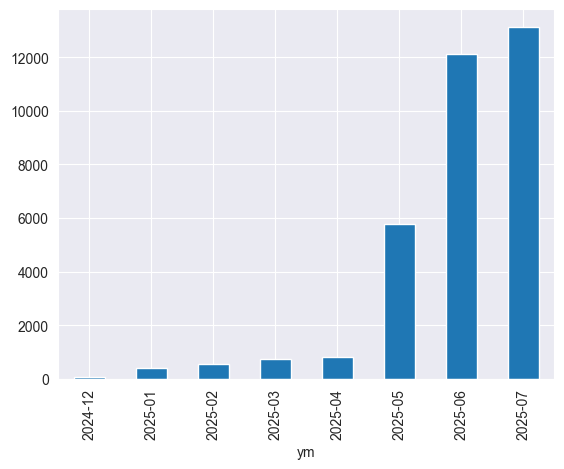

In [140]:
p.plot(kind='bar')
plt.show()

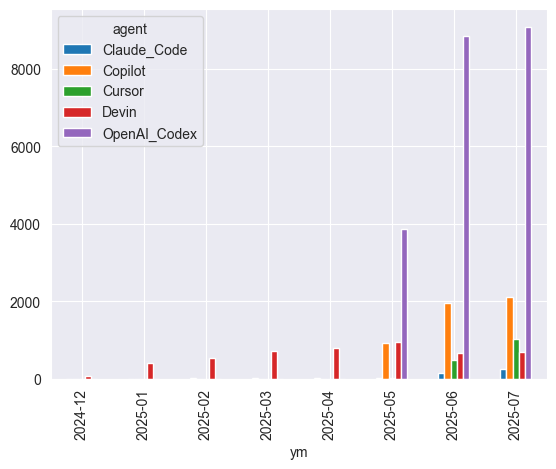

In [142]:
p = check.groupby(['ym', 'agent'])['id'].count()
p.unstack().plot(kind='bar')
plt.show()


In [ ]:
# show the number in normal format not scientific

pr_commit_details_df.groupby('pr_id')[['commit_stats_total', 'commit_stats_additions', 'commit_stats_deletions']].sum().describe()

,commit_stats_total,commit_stats_additions,commit_stats_deletions
count,3.358000e+04,3.358000e+04,3.358000e+04
mean,5.929063e+05,3.732348e+05,2.196715e+05
std,1.240097e+07,7.931148e+06,5.548334e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.300000e+01,3.000000e+01,2.000000e+00
50%,2.700000e+02,1.990000e+02,2.500000e+01
75%,2.052000e+03,1.470000e+03,3.060000e+02
max,1.224228e+09,7.757306e+08,6.121134e+08


In [126]:
3.000000e+01

30.0

In [25]:
print(f"len(pr_df): {len(pr_df)}")
print(f"len(repo_df): {len(repo_df)}")
print(f"len(user_df): {len(user_df)}")

print(f"len(pr_comments_df): {len(pr_comments_df)}")
print(f"len(pr_reviews_df): {len(pr_reviews_df)}")
print(f"len(pr_review_comments_df): {len(pr_review_comments_df)}")

print(f"len(pr_commits_df): {len(pr_commits_df)}")
print(f"len(pr_commit_details_df): {len(pr_commit_details_df)}")


print(f"len(related_issue_df): {len(related_issue_df)}")
print(f"len(issue_df): {len(issue_df)}")

print(f"len(pr_timeline_df): {len(pr_timeline_df)}")

print(f"len(pr_task_type_df): {len(pr_task_type_df)}")

print(f"len(human_pr_df): {len(human_pr_df)}")
print(f"len(human_pr_task_type_df): {len(human_pr_task_type_df)}")

len(pr_df): 33596
len(repo_df): 2807
len(user_df): 1796
len(pr_comments_df): 39122
len(pr_reviews_df): 28875
len(pr_review_comments_df): 26868
len(pr_commits_df): 88576
len(pr_commit_details_df): 711923
len(related_issue_df): 4923
len(issue_df): 4614
len(pr_timeline_df): 325500
len(pr_task_type_df): 33596
len(human_pr_df): 6618
len(human_pr_task_type_df): 6618


In [26]:
pr_df.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625


In [27]:
related_issue_df.head()

,pr_id,issue_id,source
0,3234102722,3.233113e+09,body
1,3214782537,3.189853e+09,body
2,3164567685,3.164539e+09,body
3,3165176791,2.510821e+09,body
4,3165431934,3.165438e+09,body


In [28]:
related_issue_df.shape

(4923, 3)

In [30]:
related_issue_df.source.value_counts()

source
body    4923
Name: count, dtype: int64

In [31]:
issue_df.head()

,id,number,title,body,user,state,created_at,closed_at,html_url
0,3082498013,1542,Accept api_key in from_provider,**Is your feature request related to a problem...,jeroenvds,closed,2025-05-22T08:22:22Z,2025-07-17T22:34:21Z,https://github.com/567-labs/instructor/issues/...
1,3164229012,94,Workflows Coming Soon - tools reimagined,### Project Version\n\n5.5.0\n\n### Bug Descri...,guidedways,closed,2025-06-20T19:42:16Z,2025-06-20T20:08:12Z,https://github.com/BeehiveInnovations/zen-mcp-...
2,3198054361,107,[bug]PromptX工具沙箱缓存机制不支持工具集更新,"当工具集需要改进的时候, 会遇到改进后代码和沙箱中的代码不一致的情况.对鲁班自己调试代码造成...",simonfishgit,closed,2025-07-03T05:20:38Z,2025-07-10T01:44:56Z,https://github.com/Deepractice/PromptX/issues/107
3,3208181218,129,架构优化：统一项目路径管理体系 - 合并DirectoryService与ProjectMa...,# 🎯 架构优化：统一项目路径管理体系\n\n## 🔍 问题描述\n\n当前PromptX在...,deepracticexs,closed,2025-07-07T09:12:24Z,2025-07-07T11:05:45Z,https://github.com/Deepractice/PromptX/issues/129
4,2975033421,836,Broken links to notebooks in documentation,On [this documentation page](https://incatools...,justaddcoffee,closed,2025-04-06T15:46:33Z,2025-06-05T23:32:27Z,https://github.com/INCATools/ontology-access-k...


In [32]:
issue_df.shape

(4614, 9)

In [33]:
issue_df.isnull().sum()

id               0
number           0
title            0
body           124
user             0
state            0
created_at       0
closed_at     1447
html_url         0
dtype: int64

In [34]:
issue_df.id.nunique()

4614

In [35]:
issue_df.number.nunique()

3598

In [36]:
human_pr_df.head()

,id,number,title,user,user_id,state,created_at,closed_at,merged_at,repo_url,html_url,body,agent
0,2336888723,85268,feat(aci): add automations index page,ameliahsu,55610339,closed,2025-02-14T19:04:59Z,2025-02-18T22:42:20Z,2025-02-18T22:42:19Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/85268,https://sentry-j41gpomr5.sentry.dev/automation...,Human
1,2447123365,89131,ref(insights): Make use of `<FeatureBadge>` fo...,ryan953,187460,closed,2025-04-08T23:29:50Z,2025-04-09T15:56:55Z,2025-04-09T15:56:54Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/89131,Using the premade component reduces an import ...,Human
2,2438086945,88748,:bug: fix: update how we fetch workflow_id and...,iamrajjoshi,33237075,closed,2025-04-03T21:36:59Z,2025-04-04T15:10:57Z,2025-04-04T15:10:57Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/88748,i realized i made a mistake for how i fetch th...,Human
3,2265431531,83085,fix(org-stats): Require project membership,ArthurKnaus,7033940,closed,2025-01-08T07:47:13Z,2025-01-08T08:49:40Z,2025-01-08T08:49:40Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/83085,### Problem\r\n\r\nIf the user is not member o...,Human
4,2332333882,85102,ref(consumers): Rename parallel -> batched-par...,evanpurkhiser,1421724,closed,2025-02-12T21:24:17Z,2025-02-12T22:20:33Z,2025-02-12T22:20:33Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/85102,Both crons and uptime consumers have a paralle...,Human


In [37]:
pr_task_type_df.head()

,agent,id,title,reason,type,confidence
0,Claude_Code,3264933329,Fix: Wait for all partitions in load_collectio...,title provides conventional commit label,fix,10
1,Claude_Code,3265709660,feat: add comprehensive README screenshots wit...,title provides conventional commit label,feat,10
2,Claude_Code,3265782173,chore: remove HashedPostStateProvider trait,title provides conventional commit label,chore,10
3,Claude_Code,3231949586,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10
4,Claude_Code,3231950376,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10


In [56]:
pr_review_comments_df.head()

,id,pull_request_review_id,user,user_type,diff_hunk,path,position,original_position,commit_id,original_commit_id,body,pull_request_url,created_at,updated_at,in_reply_to_id
0,2110791802,2873410389,Copilot,Bot,"@@ -80,4 +81,7 @@ export const giselleEngine =...",apps/studio.giselles.ai/app/giselle-engine.ts,12.0,12,129ddeeabb303c5e20473132b83507120cb4cfc4,6f6b42ee11f2b2b3bdcc855b9871ba48d9be25bc,[nitpick] Consider adding documentation or a c...,https://api.github.com/repos/giselles-ai/gisel...,2025-05-28T03:04:12Z,2025-05-28T03:04:13Z,NaN
1,2200843160,3010483959,dpgeorge,User,"@@ -56,6 +56,14 @@\n #define PHY_SPEED_100FULL...",ports/stm32/eth_phy.h,NaN,4,47bace5680b27e235dc5d06ee5c3adff54079d7d,05231c28d4ac24eac705507ce6b50e6e504e76d0,These constants aren't used anywhere.,https://api.github.com/repos/micropython/micro...,2025-07-11T14:09:34Z,2025-07-11T14:09:34Z,NaN
2,2137612457,2913085976,jurasic-pf,User,"@@ -0,0 +1,294 @@\n+// SPDX-FileCopyrightText:...",src/vmecpp/cpp/vmecpp/vmec/vmec_constants/vmec...,NaN,48,a7797dc5ccbee0541708f452d7b0e63bc6912bf4,e71a34ef0b09bc8994974a5b70d1de8c65d57858,Have we formally decided for/against using spe...,https://api.github.com/repos/proximafusion/vme...,2025-06-10T11:08:27Z,2025-06-10T11:08:28Z,NaN
3,2100038023,2857335398,peterdeme,User,"@@ -46,8 +47,8 @@ var flagMethod = &cli.String...",internal/cmd/profile/flags.go,NaN,39,6b1fe4fe29308e414c4aa71988dec11379dec3ce,7d6ba7bc342722ee0dbce5cd2990e6b8ef751f17,✅,https://api.github.com/repos/spacelift-io/spac...,2025-05-21T11:27:55Z,2025-05-21T11:27:55Z,2.099688e+09
4,2141214307,2918905411,coderabbitai[bot],Bot,"@@ -100,9 +100,10 @@ export const mineHandler ...",packages/actions/src/Mine/mineHandler.js,10.0,10,50322e8c8ce33d71d65ace651b3ac7aa314f0456,d24ed162cd79404c18c12f4317115bf504a1cb89,_⚠️ Potential issue_\n\n**`mempoolTx` may be `...,https://api.github.com/repos/evmts/tevm-monore...,2025-06-11T22:30:58Z,2025-06-11T22:30:59Z,NaN


In [57]:
pr_reviews_df.head()

,id,pr_id,user,user_type,state,submitted_at,body
0,2885691382,3107321792,coderabbitai[bot],Bot,COMMENTED,2025-06-01T14:22:22Z,**Actionable comments posted: 2**\n\n<details>...
1,2885712797,3107321792,coderabbitai[bot],Bot,COMMENTED,2025-06-01T14:37:45Z,**Actionable comments posted: 1**\n\n<details>...
2,3059587397,3234660269,Fank,User,COMMENTED,2025-07-27T15:06:40Z,None
3,3059589121,3234660269,benfdking,User,COMMENTED,2025-07-27T15:12:52Z,None
4,2813254905,3037457814,wilsonccccc,User,APPROVED,2025-05-03T15:34:42Z,None


In [60]:
pr_reviews_df.pr_id.nunique()

8140

In [61]:
pr_reviews_df.shape

(28875, 7)

In [58]:
pr_reviews_df.user_type.value_counts()

user_type
User    16895
Bot     11979
Name: count, dtype: int64

In [38]:
pr_task_type_df.type.value_counts()

type
feat        14450
fix          8106
docs         3887
test         2356
refactor     2288
chore         896
build         627
ci            411
perf          340
style         188
other          31
revert         16
Name: count, dtype: int64

In [39]:
pr_task_type_df.confidence.describe()

count    33596.000000
mean         9.246637
std          0.625841
min          3.000000
25%          9.000000
50%          9.000000
75%         10.000000
max         10.000000
Name: confidence, dtype: float64

In [40]:
pr_task_type_df.confidence.value_counts()

confidence
9     18702
10    11622
8      3236
7        26
5         6
3         4
Name: count, dtype: int64

In [41]:
pr_task_type_df.shape

(33596, 6)

In [42]:
pr_task_type_df.id.nunique()

33596

In [43]:
human_pr_df.head()

,id,number,title,user,user_id,state,created_at,closed_at,merged_at,repo_url,html_url,body,agent
0,2336888723,85268,feat(aci): add automations index page,ameliahsu,55610339,closed,2025-02-14T19:04:59Z,2025-02-18T22:42:20Z,2025-02-18T22:42:19Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/85268,https://sentry-j41gpomr5.sentry.dev/automation...,Human
1,2447123365,89131,ref(insights): Make use of `<FeatureBadge>` fo...,ryan953,187460,closed,2025-04-08T23:29:50Z,2025-04-09T15:56:55Z,2025-04-09T15:56:54Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/89131,Using the premade component reduces an import ...,Human
2,2438086945,88748,:bug: fix: update how we fetch workflow_id and...,iamrajjoshi,33237075,closed,2025-04-03T21:36:59Z,2025-04-04T15:10:57Z,2025-04-04T15:10:57Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/88748,i realized i made a mistake for how i fetch th...,Human
3,2265431531,83085,fix(org-stats): Require project membership,ArthurKnaus,7033940,closed,2025-01-08T07:47:13Z,2025-01-08T08:49:40Z,2025-01-08T08:49:40Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/83085,### Problem\r\n\r\nIf the user is not member o...,Human
4,2332333882,85102,ref(consumers): Rename parallel -> batched-par...,evanpurkhiser,1421724,closed,2025-02-12T21:24:17Z,2025-02-12T22:20:33Z,2025-02-12T22:20:33Z,https://api.github.com/repos/getsentry/sentry,https://github.com/getsentry/sentry/pull/85102,Both crons and uptime consumers have a paralle...,Human


In [44]:
pr_commits_df.head()

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


In [45]:
pr_commits_df.shape

(88576, 5)

In [47]:
pr_reviews_df.head()

,id,pr_id,user,user_type,state,submitted_at,body
0,2885691382,3107321792,coderabbitai[bot],Bot,COMMENTED,2025-06-01T14:22:22Z,**Actionable comments posted: 2**\n\n<details>...
1,2885712797,3107321792,coderabbitai[bot],Bot,COMMENTED,2025-06-01T14:37:45Z,**Actionable comments posted: 1**\n\n<details>...
2,3059587397,3234660269,Fank,User,COMMENTED,2025-07-27T15:06:40Z,None
3,3059589121,3234660269,benfdking,User,COMMENTED,2025-07-27T15:12:52Z,None
4,2813254905,3037457814,wilsonccccc,User,APPROVED,2025-05-03T15:34:42Z,None


In [48]:
pr_reviews_df.shape

(28875, 7)

In [49]:
pr_reviews_df.pr_id.nunique()

8140

In [51]:
pr_reviews_df.user_type.value_counts()

user_type
User    16895
Bot     11979
Name: count, dtype: int64

In [52]:
pr_reviews_df.state.value_counts()

state
COMMENTED            20431
APPROVED              6499
CHANGES_REQUESTED     1604
DISMISSED              341
Name: count, dtype: int64

In [54]:
pr_reviews_df.head()

,id,pr_id,user,user_type,state,submitted_at,body
0,2885691382,3107321792,coderabbitai[bot],Bot,COMMENTED,2025-06-01T14:22:22Z,**Actionable comments posted: 2**\n\n<details>...
1,2885712797,3107321792,coderabbitai[bot],Bot,COMMENTED,2025-06-01T14:37:45Z,**Actionable comments posted: 1**\n\n<details>...
2,3059587397,3234660269,Fank,User,COMMENTED,2025-07-27T15:06:40Z,None
3,3059589121,3234660269,benfdking,User,COMMENTED,2025-07-27T15:12:52Z,None
4,2813254905,3037457814,wilsonccccc,User,APPROVED,2025-05-03T15:34:42Z,None
